# Supplemental Material: SAI Storylines under GLENS

In [1]:
# __authors__: Elizabeth Barnes and Patrick Keys
# __date__: Aug 01, 2022

In [2]:
import importlib as imp
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import datetime
from icecream import ic

import data_processing_glens, plots

import cartopy as ct
import palettable
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["figure.dpi"] = 150
savefig_dpi = 300
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
import warnings
warnings.filterwarnings("ignore")



FS = 10
plt.rc('text',usetex=True)
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']}) 
plt.rc('savefig',facecolor='white')
plt.rc('axes',facecolor='white')
plt.rc('axes',labelcolor='dimgrey')
plt.rc('axes',labelcolor='dimgrey')
plt.rc('xtick',color='dimgrey')
plt.rc('ytick',color='dimgrey')

map_proj = ct.crs.EqualEarth(central_longitude = 0.)

In [3]:
TREND_YEARS_GLENS = (2070,2079)
TREND_YEARS_CTRL = (2010,2019)
WARMING_CUTOFF = 0.01

DATA_DIRECTORY = '../glens_detection/data/GLENS/'
FIGURE_DIRECTORY = 'figures/supp_glens/'

## Get the data

In [4]:
imp.reload(data_processing_glens)
mask = data_processing_glens.get_land_mask(DATA_DIRECTORY + 'landSeaMask.r90x45.nc', var="TN10p")
da_all = data_processing_glens.get_data(DATA_DIRECTORY)
da_control = data_processing_glens.get_control_data(DATA_DIRECTORY)

mask['lat'] = da_all['lat']

ensemble member = 001
ensemble member = 002
ensemble member = 003
ensemble member = 004
ensemble member = 005
ensemble member = 006
ensemble member = 007
ensemble member = 008
ensemble member = 009
ensemble member = 010
ensemble member = 011
ensemble member = 012
ensemble member = 013
ensemble member = 014
ensemble member = 015
ensemble member = 016
ensemble member = 017
ensemble member = 018
ensemble member = 019
ensemble member = 020
ensemble member = 021
(21, 88, 45, 90)
ensemble member = 001
ensemble member = 002
ensemble member = 003
ensemble member = 004
ensemble member = 005
ensemble member = 006
ensemble member = 007
ensemble member = 008
ensemble member = 009
ensemble member = 010
ensemble member = 011
ensemble member = 012
ensemble member = 013
ensemble member = 014
ensemble member = 015
ensemble member = 016
ensemble member = 017
ensemble member = 018
ensemble member = 019
ensemble member = 020
ensemble member = 021
(21, 88, 45, 90)


In [5]:
imp.reload(data_processing_glens)
da_all_mean = da_all.mean("member")

# --------------------------------
# Control trends
da_mean_trends_cntrl = data_processing_glens.compute_trends(da_all_mean, TREND_YEARS_CTRL[0], TREND_YEARS_CTRL[1])
ic(da_mean_trends_cntrl.shape)

da_mean_trends_cntrl20 = data_processing_glens.compute_trends(da_all_mean, 2010, 2029)
ic(da_mean_trends_cntrl20.shape)

da_trends_cntrl = data_processing_glens.compute_trends(da_all, TREND_YEARS_CTRL[0], TREND_YEARS_CTRL[1])
ic(da_trends_cntrl.shape)

# --------------------------------
# GLENS trends
da_mean_trends_glens = data_processing_glens.compute_trends(da_all_mean, TREND_YEARS_GLENS[0], TREND_YEARS_GLENS[1])
ic(da_mean_trends_glens.shape)

da_mean_trends_glens35 = data_processing_glens.compute_trends(da_all_mean, TREND_YEARS_GLENS[0], TREND_YEARS_GLENS[0]+34)
ic(da_mean_trends_glens35.shape)

da_trends_glens = data_processing_glens.compute_trends(da_all, TREND_YEARS_GLENS[0], TREND_YEARS_GLENS[1])
ic(da_trends_glens.shape)


ic| da_mean_trends_cntrl.shape: (2, 45, 90)
ic| da_mean_trends_cntrl20.shape: (2, 45, 90)
ic| da_trends_cntrl.shape: (2, 21, 45, 90)
ic| da_mean_trends_glens.shape: (2, 45, 90)
ic| da_mean_trends_glens35.shape: (2, 45, 90)
ic| da_trends_glens.shape: (2, 21, 45, 90)


(2, 21, 45, 90)

# Perceived Failures Frequency

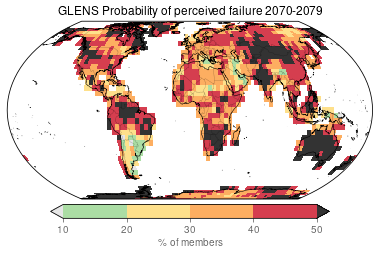

In [7]:
fig = plt.figure(figsize=(5.0*2*1.5*.9*.8,3.75*1.5*2*.75*.8),)#constrained_layout=True) #gridspec_kw={'width_ratios': [3, 2]})
spec = fig.add_gridspec(ncols=12, nrows=10)

MASK_BOOL = True

#-----------------------------------------------------------------
# PERCEIVED FAILURES
# ax = fig.add_subplot(2,2,1,projection=map_proj)
ax = fig.add_subplot(spec[:5,0:6],projection=map_proj)

cmap = plots.get_qual_cmap()
cmap = palettable.colorbrewer.diverging.Spectral_8_r.mpl_colors
cmap = np.delete(cmap,(0,1,3,6),0)
cmap = ListedColormap(cmap)

da_plot = da_trends_glens[0,:,:,:].squeeze()
da_plot_cntrl = da_trends_cntrl[0,:,:,:].squeeze()

da_quad_1 = xr.where((da_plot_cntrl>=WARMING_CUTOFF) & (da_plot>=WARMING_CUTOFF), 1, 0) 
da_quad_2 = xr.where((da_plot_cntrl<WARMING_CUTOFF) & (da_plot>=WARMING_CUTOFF), 1, 0) 
da_quad_3 = xr.where((da_plot_cntrl<WARMING_CUTOFF) & (da_plot<WARMING_CUTOFF), 1, 0) 
da_quad_4 = xr.where((da_plot_cntrl>=WARMING_CUTOFF) & (da_plot<WARMING_CUTOFF), 1, 0) 
da_quad = (da_quad_1 + da_quad_2).sum("member")/len(da_plot["member"].values)

#---------------------
if MASK_BOOL:
    da_plot_member = da_quad.to_numpy() * mask.to_numpy()
else:
    da_plot_member = da_quad

cb,p = plots.drawOnGlobe(ax, 
                  map_proj, 
                  data=da_plot_member*100, 
                  lats=da_quad["lat"],
                  lons=da_quad["lon"],
                  cmap=cmap,
                  vmin= 10, 
                  vmax= 50, 
                  inc=None, 
                  cbarBool=False, 
                  contourMap=[], 
                  contourVals = [], 
                  fastBool=True, 
                  extent='both',
                 )   
   
p.set_clim(10,50)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
p.cmap.set_over('.2')
p.cmap.set_under('.9')
cbar = plt.colorbar(p,ax=ax,label='\% of members',ticks=np.arange(10,50+10,10), extend="both",orientation='horizontal',pad=.025,shrink=.7)
cbar.ax.set_xticklabels(np.arange(10,50+10,10)) 

ax.set_title('GLENS Probability of perceived failure ' + str(TREND_YEARS_GLENS[0]) + '-' + str(TREND_YEARS_GLENS[1]))     


#-----------------------------------------------------------------
fig.tight_layout(pad=1.08, h_pad=1, w_pad=-4)
# plt.tight_layout()
plt.savefig(FIGURE_DIRECTORY + 'GLENS_perceived_failure_figure4_' + str(TREND_YEARS_GLENS[0]) + '_' + str(TREND_YEARS_GLENS[1]) + '.png', bbox_inches="tight", dpi=savefig_dpi)
plt.show()